In [47]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [48]:
train = pd.read_csv('sign-language-mnist/sign_mnist_train.csv')
test = pd.read_csv('sign-language-mnist/sign_mnist_train.csv')

In [49]:
print(train.shape)
print(test.shape)

(27455, 785)
(27455, 785)


In [50]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [51]:
# Create training and testing arrays
train_set = np.array(train, dtype = 'float32')
test_set = np.array(test, dtype='float32')

In [52]:
#Specifying class labels
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

(-0.5, 27.5, 27.5, -0.5)

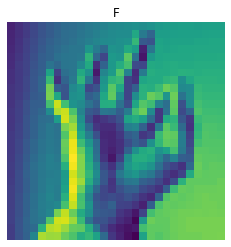

In [53]:
#See a random image for class label verification
i = random.randint(1,27455)
plt.imshow(train_set[i,1:].reshape((28,28))) 
plt.imshow(train_set[i,1:].reshape((28,28))) 
label_index = train["label"][i]
plt.title(f"{class_names[label_index]}")
plt.axis('off')

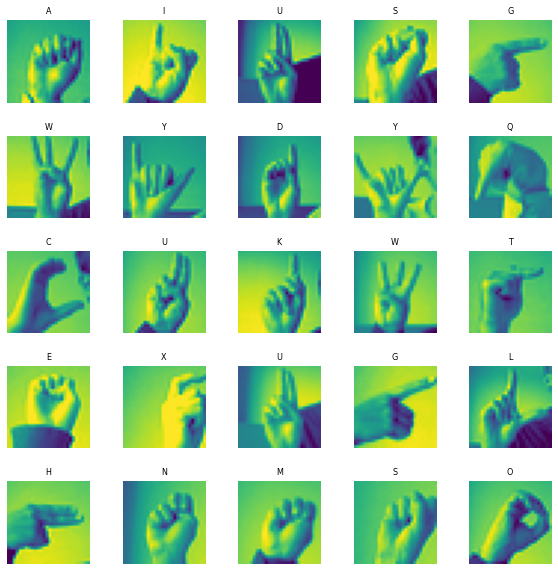

In [54]:
# Define the dimensions of the plot grid 
W_grid = 5
L_grid = 5
fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))
axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array
n_train = len(train_set) # get the length of the train dataset
# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 
    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow( train_set[index,1:].reshape((28,28)) )
    label_index = int(train_set[index,0])
    axes[i].set_title(class_names[label_index], fontsize = 8)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

In [55]:
# Prepare the training and testing dataset 
X_train = train_set[:, 1:] / 255
y_train = train_set[:, 0]

X_test = test_set[:, 1:] / 255
y_test = test_set[:,0]

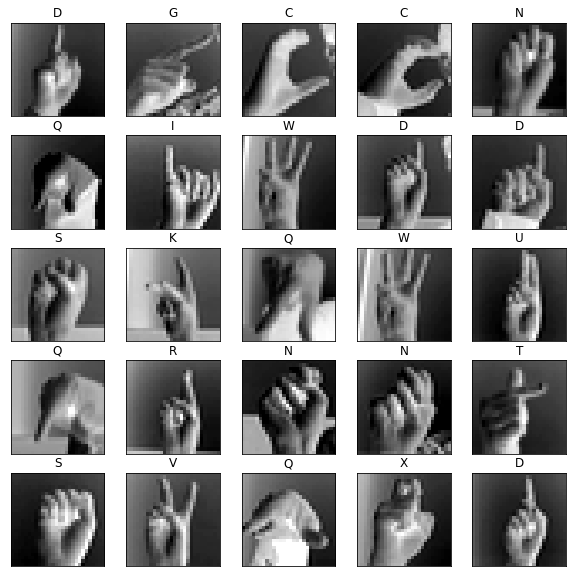

In [56]:
#Visualize train images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape((28,28)), cmap=plt.cm.binary)
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

In [57]:
#Split the training and test sets
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [58]:
print(X_train.shape)
print(y_train.shape)

(21964, 784)
(21964,)


In [59]:
# Unpack the training and test tuple
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

print(X_train.shape)
print(y_train.shape)
print(X_validate.shape)

(21964, 28, 28, 1)
(21964,)
(5491, 28, 28, 1)


In [60]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [61]:
#Defining the Convolutional Neural Network
cnn_model = Sequential()

cnn_model.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(128, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 512, activation = 'relu'))
cnn_model.add(Dropout(0.25))
cnn_model.add(Dense(units = 25, activation = 'softmax'))

In [62]:
#CNN Model Summary
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 128)        

In [63]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam' ,metrics =['accuracy'])

In [64]:
#Training the CNN model
history = cnn_model.fit(X_train, y_train, batch_size = 512, epochs = 40, verbose = 1, validation_data = (X_validate, y_validate))

Epoch 1/40
43/43 [==============================] - 2s 24ms/step - loss: 3.1760 - accuracy: 0.0527 - val_loss: 3.1007 - val_accuracy: 0.1073
Epoch 2/40
43/43 [==============================] - 1s 14ms/step - loss: 2.7971 - accuracy: 0.1351 - val_loss: 2.3903 - val_accuracy: 0.2621
Epoch 3/40
43/43 [==============================] - 1s 16ms/step - loss: 2.1128 - accuracy: 0.3174 - val_loss: 1.5001 - val_accuracy: 0.5307
Epoch 4/40
43/43 [==============================] - 1s 15ms/step - loss: 1.4392 - accuracy: 0.5119 - val_loss: 0.9625 - val_accuracy: 0.6981
Epoch 5/40
43/43 [==============================] - 1s 14ms/step - loss: 1.0703 - accuracy: 0.6304 - val_loss: 0.6768 - val_accuracy: 0.8035
Epoch 6/40
43/43 [==============================] - 1s 14ms/step - loss: 0.8428 - accuracy: 0.7074 - val_loss: 0.5014 - val_accuracy: 0.8592
Epoch 7/40
43/43 [==============================] - 1s 14ms/step - loss: 0.7048 - accuracy: 0.7570 - val_loss: 0.4067 - val_accuracy: 0.8895
Epoch 8/40
43

In [65]:
model_evaluation_history = cnn_model.evaluate(X_train, y_train)


687/687 [==============================] - 3s 4ms/step - loss: 8.9025e-04 - accuracy: 1.0000


Text(0.5, 1.0, 'Accuracy evolution')

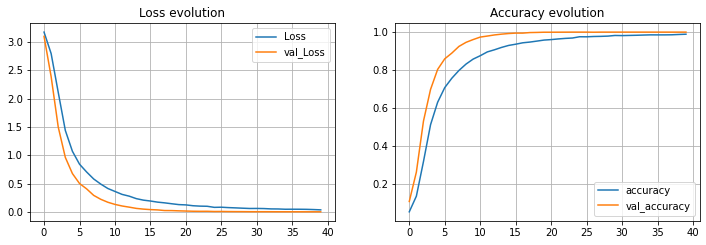

In [66]:
#Visualizing the training performance
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.grid()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy evolution')

In [77]:
#Predictions for the test data
predicted_classes = cnn_model.predict(X_test)
print(predicted_classes.shape)

(27455, 25)


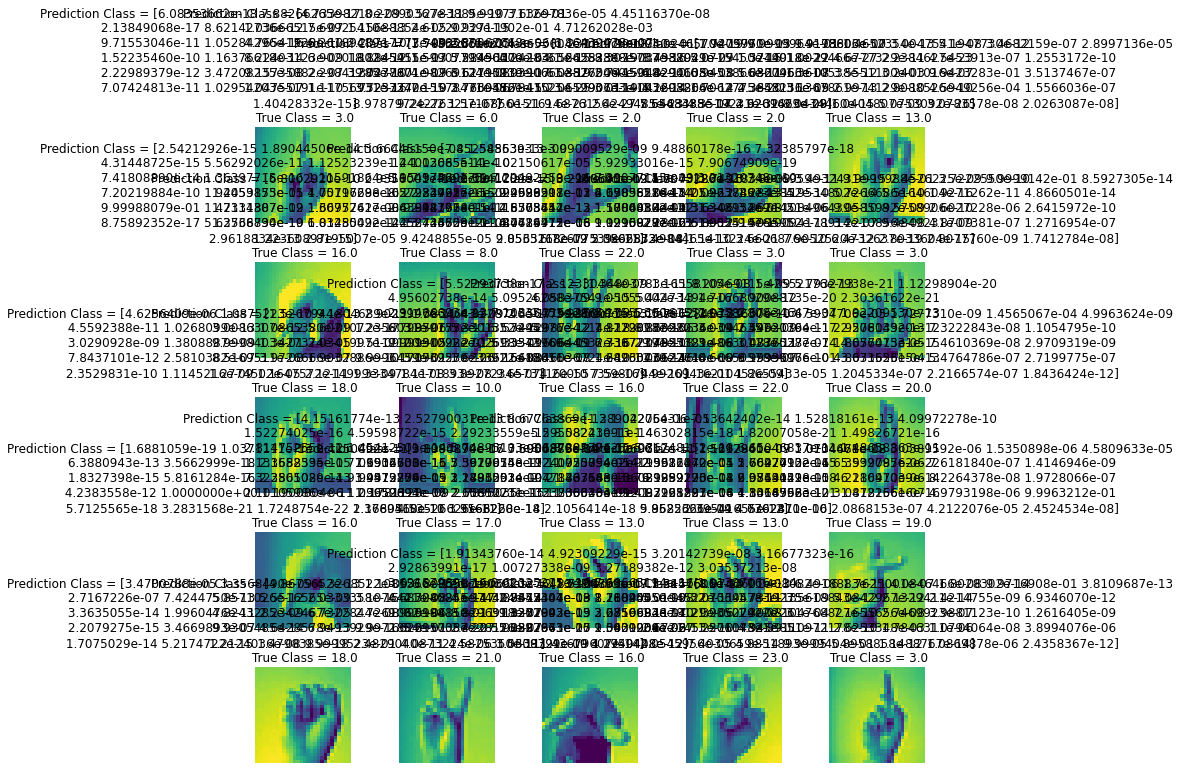

In [76]:
#Visualize predictions
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title(f"Prediction Class = {predicted_classes[i]}\n True Class = {y_test[i]}")
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)